### PROJECT5-2 날씨 좋은 월요일 오후 세시, 자전거 타는 사람은 몇 명? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#### (1) 데이터 가져오기 
- [Kaggle:Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data?select=test.csv)

In [3]:
train = pd.read_csv('/home/aiffel/Aiffel/05_bike_regression/data/train.csv')

In [4]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


#### (2) Datetime 자료형으로 변환 및 Column생성

In [5]:
train['year'] = pd.to_datetime(train['datetime']).dt.year
train['month'] = pd.to_datetime(train['datetime']).dt.month
train['day'] = pd.to_datetime(train['datetime']).dt.day
train['hour'] = pd.to_datetime(train['datetime']).dt.hour
train['minute'] = pd.to_datetime(train['datetime']).dt.minute
train['second'] = pd.to_datetime(train['datetime']).dt.second
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


#### (3) 데이터 확인

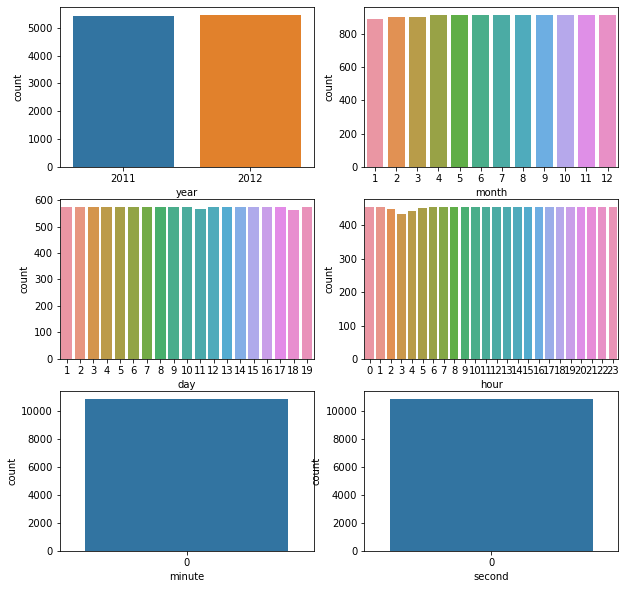

In [6]:
column_ls = ['year', 'month', 'day', 'hour', 'minute', 'second']
plt.figure(figsize=(10,10))
for i, column in enumerate(column_ls):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=column, data=train)

- 2011년과 2012년의 데이터가 있고 시간단위로 수집하였습니다. 또한 데이터가 시간에 따라 고루 분포합니다. 

In [21]:
columns_ls = ['count', 'year', 'month','day', 'hour', 'season']
count_sum_by_year = train[columns_ls].groupby('year').agg('sum').reset_index()
count_sum_by_month = train[columns_ls].groupby('month').agg('sum').reset_index()
count_sum_by_day = train[columns_ls].groupby('day').agg('sum').reset_index()
count_sum_by_hour = train[columns_ls].groupby('hour').agg('sum').reset_index()

<AxesSubplot:xlabel='hour', ylabel='count'>

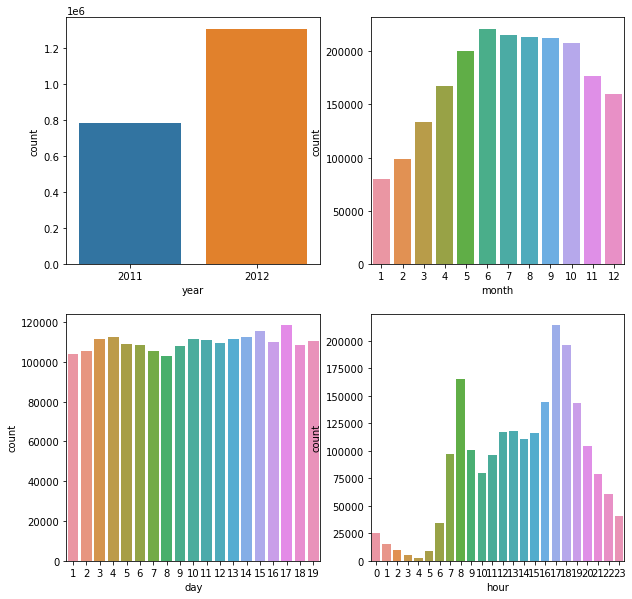

In [22]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.barplot(x = 'year', y= 'count', data = count_sum_by_year)
plt.subplot(2, 2, 2)
sns.barplot(x = 'month', y= 'count', data = count_sum_by_month)
plt.subplot(2, 2, 3)
sns.barplot(x = 'day', y= 'count', data = count_sum_by_day)
plt.subplot(2, 2, 4)
sns.barplot(x = 'hour', y= 'count', data = count_sum_by_hour)

-위의 그래프에서 2011년보다 2012년에 사용자가 더 많이 늘어 났다는 것을 알 수 있고 겨울의 이용자는 줄어듭니다. 또한 시간대 별로는 저녁 시간에 이용자 수가 가장 많습니다.

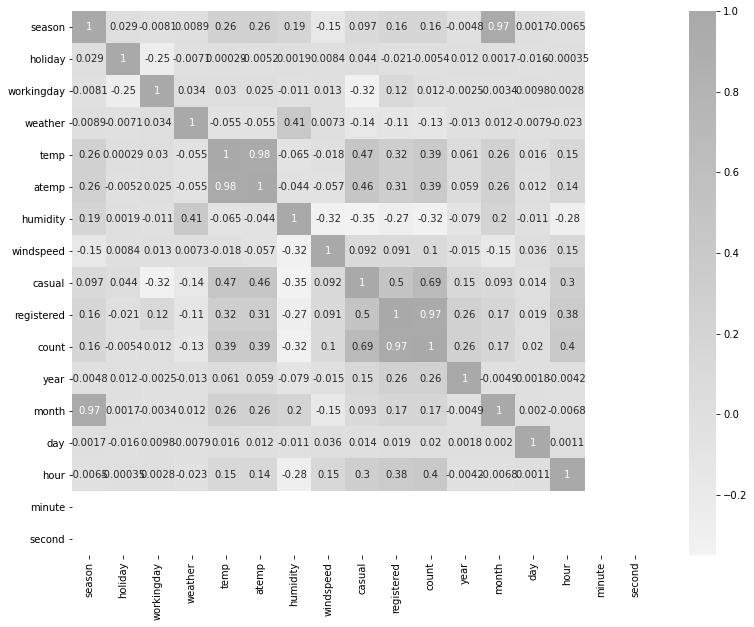

In [76]:
plt.figure(figsize=(13,10))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(train.corr(), annot=True, cmap=cmap)
plt.show()

각 변수들의 상관관계를 히트맵으로 그려 보았을때 상관관계를 가지는 변수들이 존재합니다. 이러한 독립 변수들은 데이터에 모두 포함하지 않고 필요한 변수만을 선택하여 학습을 시키는 것이 더욱 효과적이라고 생각합니다. 

In [51]:
columns_ls = ['year', 'month', 'hour','day', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
X = train[columns_ls]
y = train['count']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### (4) 모델 학습

In [53]:
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred = model.predict(X_test)
print(y_pred)

[250.72608719  48.4195939  200.84945493 ... 122.28480824 166.4099547
  67.51909928]


In [56]:
mse = mean_squared_error(y_test, y_pred)
rmse=mse**0.5
print(f'rmse : {rmse}')

rmse : 141.76788104225588


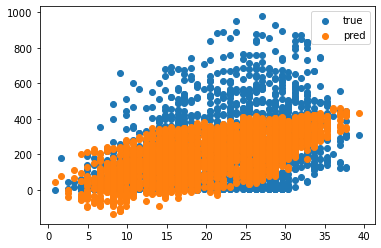

In [57]:
plt.scatter(X_test['temp'], y_test, label='true')
plt.scatter(X_test['temp'], y_pred, label='pred')
plt.legend()
plt.show()

온도에 따른 이용자의 수와 예측을 비교하여 보았을때 실제 데이터는 같은 온도에서도 이용자수가 고루 분포되어 있는 것과 달리 예측한 값은 밀집되어 있는 것을 볼 수 있습니다. 따라서 학습을 시킨 모델이 충분히 학습이 되지 않았다고 판단하였습니다. 

#### (5) 고찰
 - day에 따른 이용자의 수는 크게 변화가 없습니다. 
 - season과 month는 큰 상관 관계를 가지고 있어 하나의 변수만 선택하여 사용이 가능할 것이라고 생각합니다. 
 - 하지만 위의 독립변수를 제거하고 학습을 시키는 오히려 rmse가 조금 증가하였습니다. 
 - 이는 데이터가 정확한 예측을 하기에 부족한 상태에서 독립변수의 수를 줄이니 오히려 성능이 떨어지는 것이 아닐까라는   
   생각을 하였습니다. 
 - 또한 feature engineering을 통해 유요한 변수를 생성하여 줄 필요가 있을 것 같습니다.